In [1]:
# Mitigating Noise on Real Quantum Computers
from qiskit import *

In [2]:
nqubit = 3
circuit = QuantumCircuit(nqubit, nqubit)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2,], [0,1,2])

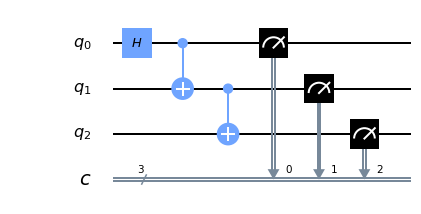

In [3]:
%matplotlib inline
circuit.draw(output = 'mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
res = execute(circuit , backend = simulator, shots = 1024).result()

In [5]:
from qiskit.visualization import plot_histogram

In [7]:
plot_histogram(res.get_counts())
print(res.get_counts())

{'000': 512, '111': 512}


In [33]:
IBMQ.load_account()
prov = IBMQ.get_provider(hub='ibm-q')
device = prov.get_backend('ibmq_essex')

Credentials are already in use. The existing account in the session will be replaced.


In [34]:
job = execute(circuit, backend = device , shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)


5e622b729a24ca00116cbb25
Job Status: job has successfully run


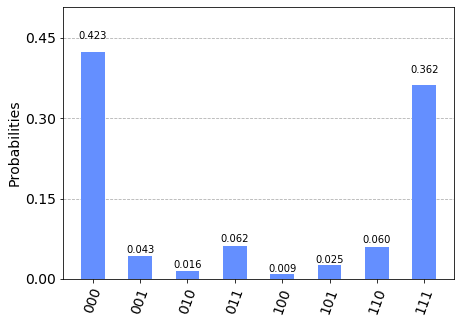

In [35]:
res = job.result()
plot_histogram(res.get_counts(circuit))

In [36]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [37]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

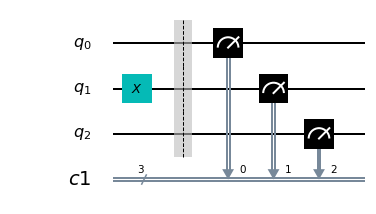

In [38]:
cal_circuits[2].draw(output = 'mpl')

In [39]:
len(cal_circuits)

8

In [40]:
cal_job = execute(cal_circuits,
                 backend = device,
                 shots = 8192,
                 optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5e62315377e24c0011eee20f
Job Status: job has successfully run


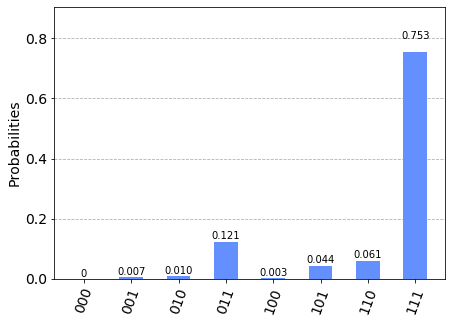

In [53]:
plot_histogram(cal_results.get_counts(cal_circuits[7]))

In [42]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

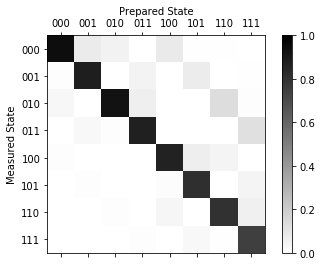

In [43]:
meas_fitter.plot_calibration()

In [45]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(cal_results)


In [47]:
device_counts = cal_results.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend = ['device, noisy', 'device,mitigated'])

QiskitError: 'Data for experiment "circuit0" could not be found.'

In [ ]:
circuit2 = QuantumCircuit(3,3)
circuit.x(1)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2,], [0,1,2])
circuit2.draw(output = 'mpl')

In [ ]:
plot_histogram(
    execute(circuit2, backend = simulator, shots = 1024).result().get_counts(circuit2)
)

In [ ]:
device_counts_2 = execute(circuit2, backend = device, shots = 1024).result().get_counts(circuit2)

In [ ]:
plot_histogram(device_counts_2)

In [ ]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)
plot_histogram(device_mitigated_counts_2)